In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
trPath = "../data/train.csv"
tePath = "../data/test.csv"
trainDF, testDF = pd.read_csv(trPath), pd.read_csv(tePath)
trainDF.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
# 先查看一下 SalePrice 的基本情况
trainDF['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

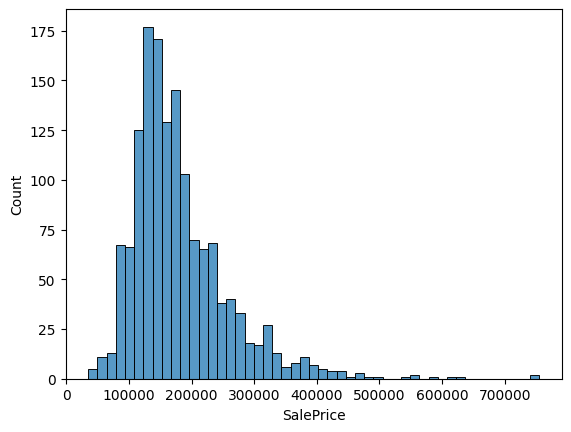

In [11]:
sns.histplot(trainDF["SalePrice"])
plt.show()

In [12]:
# 偏度为正，峰度大于3
trainDF["SalePrice"].skew(), trainDF["SalePrice"].kurtosis()

(1.8828757597682129, 6.536281860064529)

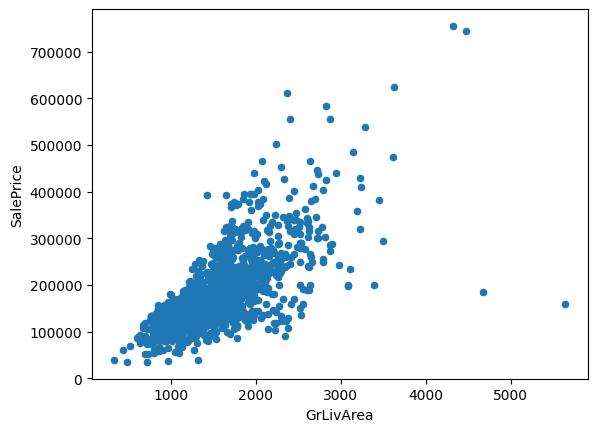

In [20]:
var = 'GrLivArea'
data = pd.concat([trainDF['SalePrice'], trainDF[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice');

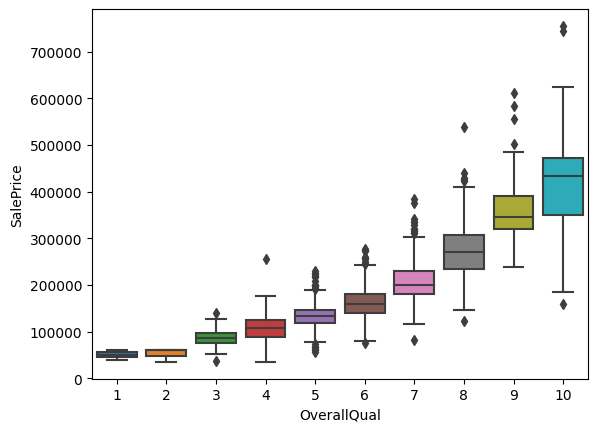

In [21]:
var = 'OverallQual'
data = pd.concat([trainDF[var], trainDF["SalePrice"]], axis=1)
sns.boxplot(x=var, y="SalePrice", data=data)
plt.show()

查看具有缺失值的列

(<AxesSubplot: >, ['FireplaceQu', 'Fence', 'Alley', 'MiscFeature', 'PoolQC'])

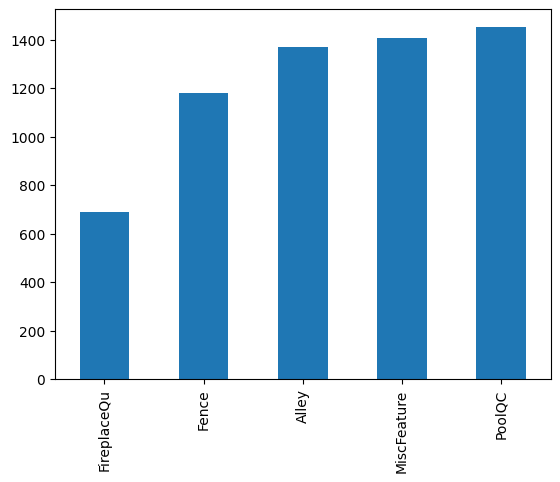

In [46]:
missing = trainDF.isnull().sum()
missing = missing[missing>(trainDF.shape[0]//4)]
missing.sort_values(inplace=True)
mov_f = list(dict(missing).keys())
missing.plot.bar(), mov_f

In [47]:
mov_f.append("Id")
mov_f.append("SalePrice")
train = trainDF.drop(labels=mov_f, axis=1)
train.shape

(1460, 74)

对数值特征进行归一化

In [48]:
numeric = [f for f in train.columns if train.dtypes[f] != 'object']
# len(numeric) # 36个特征是数字的
train[numeric] = train[numeric].apply(lambda x: (x-x.mean())/x.std())
train[numeric] = train[numeric].fillna(0)
# train[numeric].iloc[0, :]

对分类特征进行one-hot编码(这将创造出大量特征)

In [49]:
# 其中一个需要考虑的问题是, 缺失值如何处理?
# 不妨先把缺失也看做属性值的一部分
train = pd.get_dummies(train, dummy_na=True)
train.shape

(1460, 308)

通过values属性，我们可以 从pandas格式中提取NumPy格式，并将其转换为张量表示用于训练

In [50]:
train.iloc[:5, 1:4]

,LotFrontage,LotArea,OverallQual
0,-0.207948,-0.207071,0.651256
1,0.409724,-0.091855,-0.071812
2,-0.084413,0.073455,0.651256
3,-0.413838,-0.096864,0.651256
4,0.574436,0.375020,1.374324


In [51]:
trainDF.shape, testDF.shape

((1460, 81), (1459, 80))

In [55]:
data = pd.concat([trainDF.iloc[:, 1:-1], testDF[:, 1:]], axis=1)
data.shape

InvalidIndexError: (slice(None, None, None), slice(1, None, None))